<a href="https://colab.research.google.com/github/chinmaykatdare05/Google-Fit-Analytics/blob/main/Google%20Fit%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Load the Data***

In [2]:
df = pd.read_csv("/content/Daily activity metrics.csv")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date')
df = df.fillna(0)

df.head()

,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Walking duration (ms)
Date,,,,,,,,,
2023-12-09,0.0,1595.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2023-12-10,18.0,1650.899200,1022.810400,4.0,0.954276,1.345400,0.326232,1497.0,941335.0
2023-12-11,78.0,1820.086090,4698.336197,31.0,0.622355,1.428334,0.250112,6934.0,3829162.0
2023-12-12,85.0,1860.764160,4602.236401,20.0,0.624751,1.331994,0.317249,6736.0,4523490.0
2023-12-13,67.0,3317.829262,3020.337409,18.0,0.425230,1.329805,0.260986,4993.0,2801990.0


In [3]:
df['Walking duration (s)'] = df['Walking duration (ms)'] / 1000
df.drop(columns=['Walking duration (ms)'], inplace=True)

columns = ['Move Minutes count', 'Calories (kcal)', 'Distance (m)', 'Walking duration (s)', 'Min speed (m/s)', 'Average speed (m/s)', 'Max speed (m/s)', 'Step count', 'Heart Points']
df = df[columns]

df.head()

,Move Minutes count,Calories (kcal),Distance (m),Walking duration (s),Min speed (m/s),Average speed (m/s),Max speed (m/s),Step count,Heart Points
Date,,,,,,,,,
2023-12-09,0.0,1595.750000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0
2023-12-10,18.0,1650.899200,1022.810400,941.335,0.326232,0.954276,1.345400,1497.0,4.0
2023-12-11,78.0,1820.086090,4698.336197,3829.162,0.250112,0.622355,1.428334,6934.0,31.0
2023-12-12,85.0,1860.764160,4602.236401,4523.490,0.317249,0.624751,1.331994,6736.0,20.0
2023-12-13,67.0,3317.829262,3020.337409,2801.990,0.260986,0.425230,1.329805,4993.0,18.0


In [4]:
df.shape

(221, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221 entries, 2023-12-09 to 2024-07-19
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Move Minutes count    221 non-null    float64
 1   Calories (kcal)       221 non-null    float64
 2   Distance (m)          221 non-null    float64
 3   Walking duration (s)  221 non-null    float64
 4   Min speed (m/s)       221 non-null    float64
 5   Average speed (m/s)   221 non-null    float64
 6   Max speed (m/s)       221 non-null    float64
 7   Step count            221 non-null    float64
 8   Heart Points          221 non-null    float64
dtypes: float64(9)
memory usage: 17.3 KB


In [6]:
df.describe()

,Move Minutes count,Calories (kcal),Distance (m),Walking duration (s),Min speed (m/s),Average speed (m/s),Max speed (m/s),Step count,Heart Points
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,54.696833,1790.536266,2955.919324,2487.595176,0.274536,0.555208,1.280321,4302.701357,10.529412
std,43.659566,218.133957,2265.581054,2133.991599,0.052295,0.182629,0.441960,3204.989583,10.550971
min,0.000000,981.215734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1685.549295,1218.329960,1065.728000,0.259626,0.449609,1.250577,1902.000000,0.000000
50%,53.000000,1766.526185,2879.446747,2373.151000,0.270914,0.563984,1.426289,4206.000000,9.000000
75%,77.000000,1838.487199,4245.545599,3546.383000,0.293490,0.663235,1.501693,6076.000000,16.000000
max,386.000000,3317.829262,16357.943900,19651.526000,0.502447,1.305417,2.202378,24551.000000,49.000000


## ***Exploratory Data Analysis***

### Correlation Heatmap

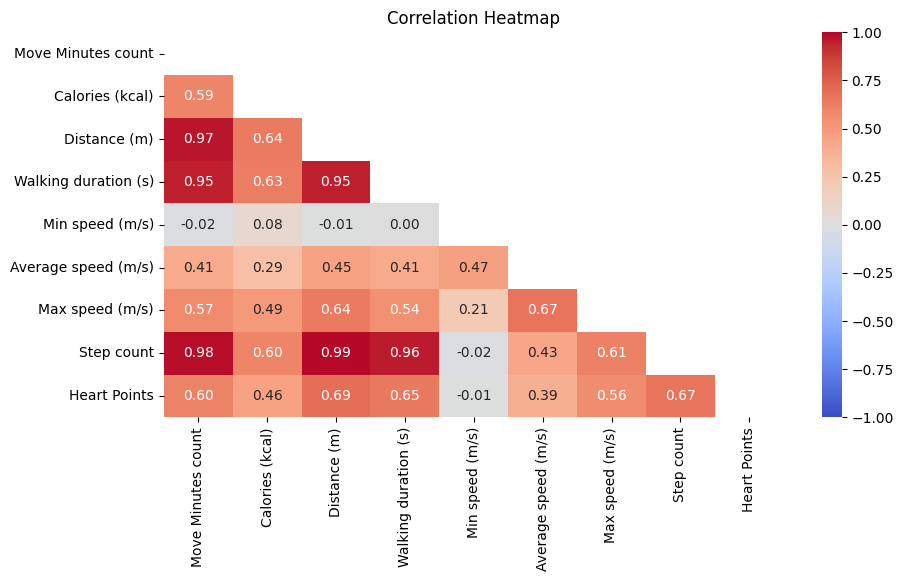

In [7]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, fmt=".2f", mask = mask, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Time Series Plot of Move Minutes

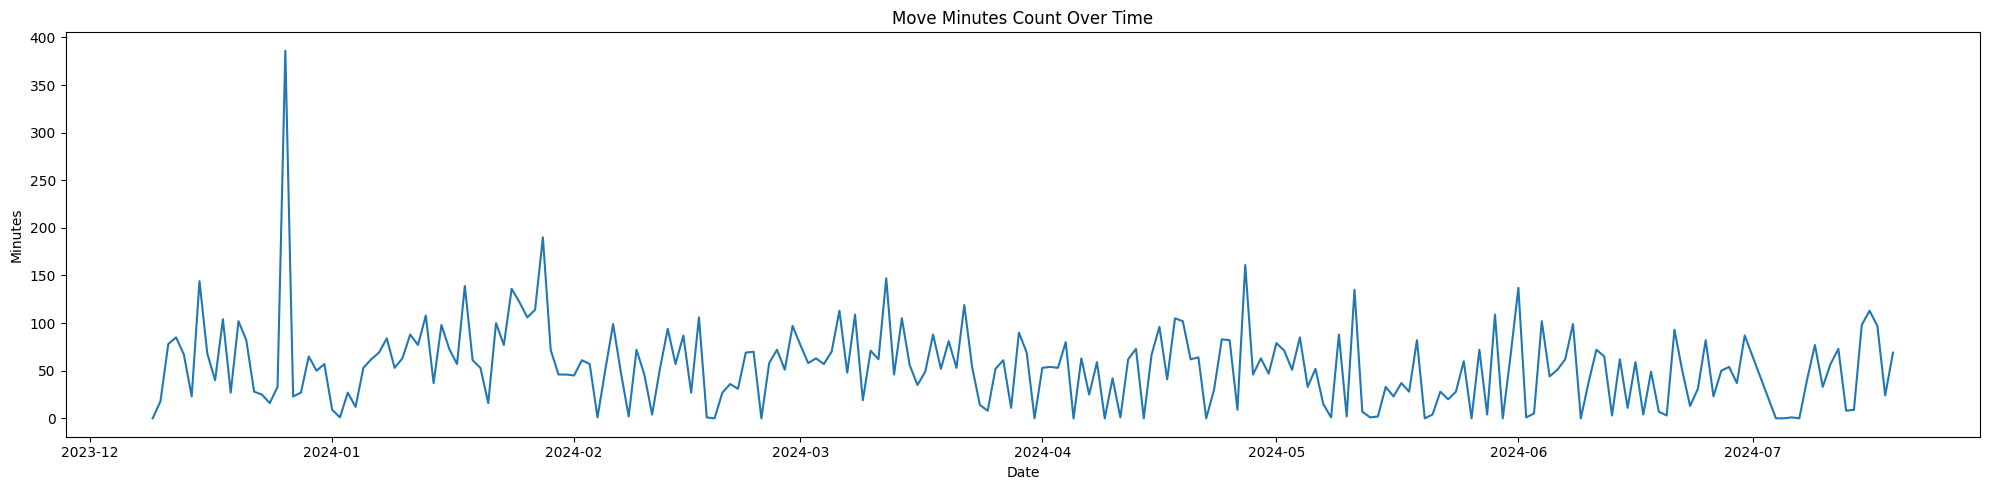

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['Move Minutes count'])
plt.title('Move Minutes Count Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()

### Violin Plot of Step Count

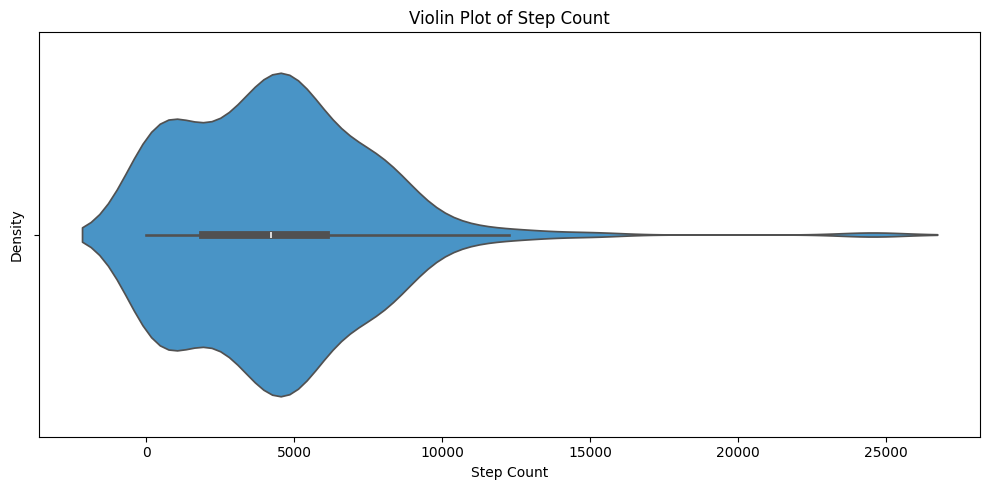

In [9]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df['Step count'], color='#3498db')
plt.title('Violin Plot of Step Count')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Line Plot of Speed

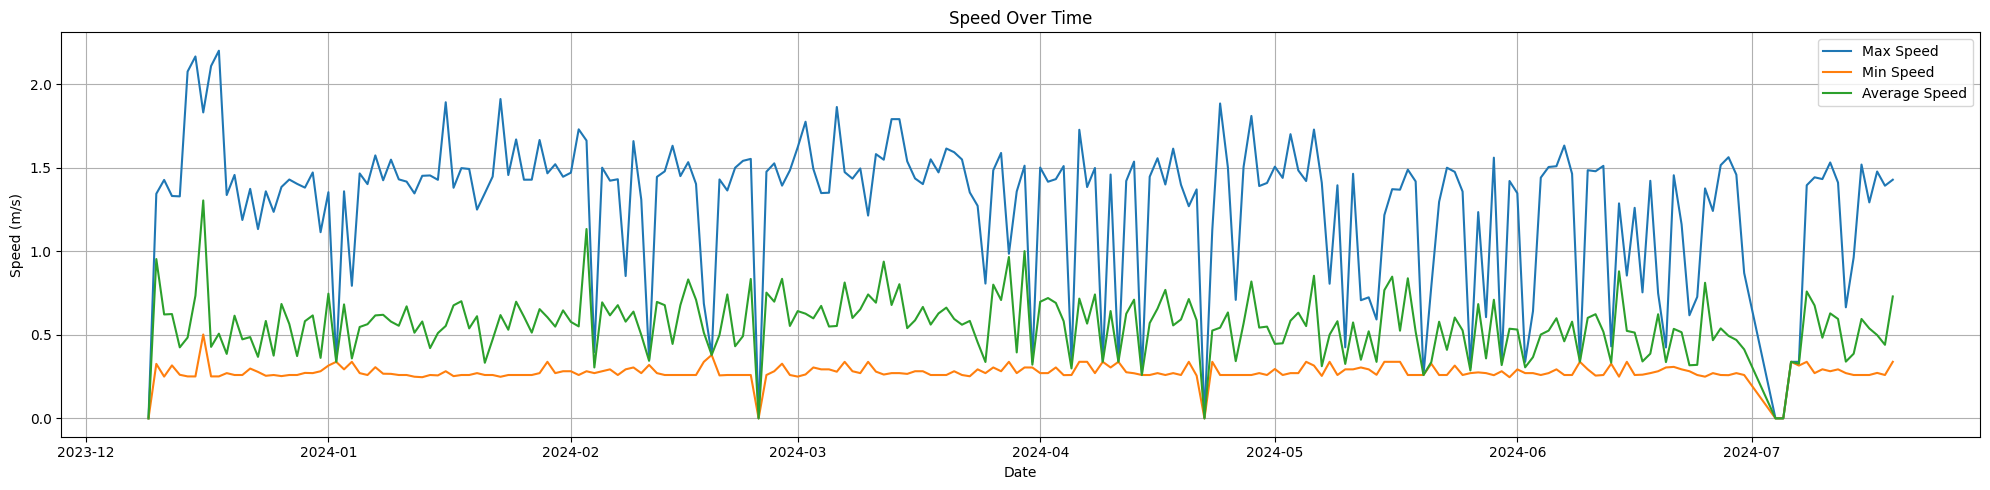

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['Max speed (m/s)'], label='Max Speed')
plt.plot(df.index, df['Min speed (m/s)'], label='Min Speed')
plt.plot(df.index, df['Average speed (m/s)'], label='Average Speed')
plt.title('Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatter Plot of Calories Burned vs. Move Minutes Count

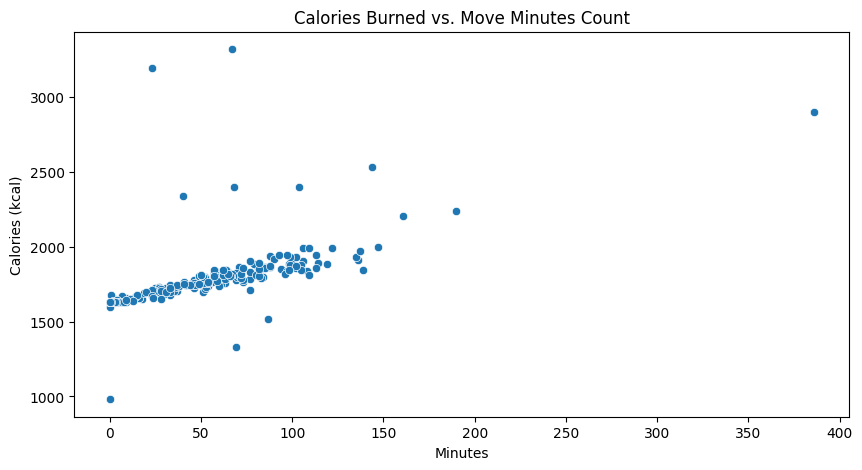

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Move Minutes count', y='Calories (kcal)')
plt.title('Calories Burned vs. Move Minutes Count')
plt.xlabel('Minutes')
plt.ylabel('Calories (kcal)')
plt.show()

### Scatter Plot of Distance Covered vs. Heart Points

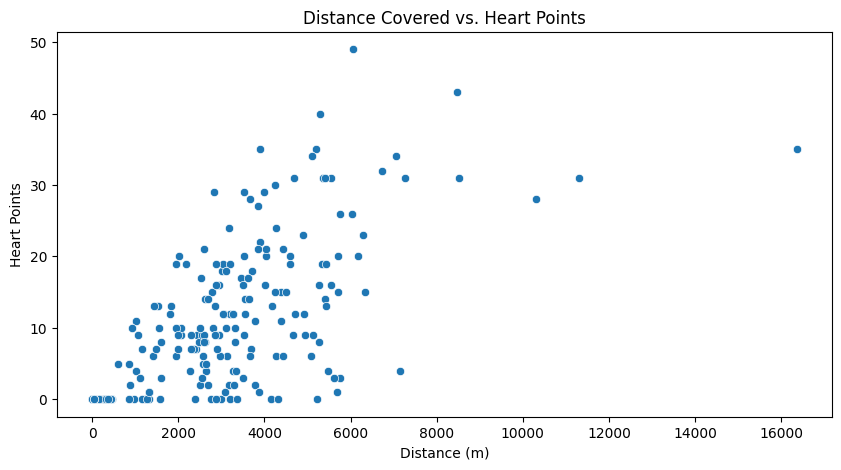

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Distance (m)', y='Heart Points')
plt.title('Distance Covered vs. Heart Points')
plt.xlabel('Distance (m)')
plt.ylabel('Heart Points')
plt.show()

### Scatter Plot of Walking Duration vs. Average speed (m/s)

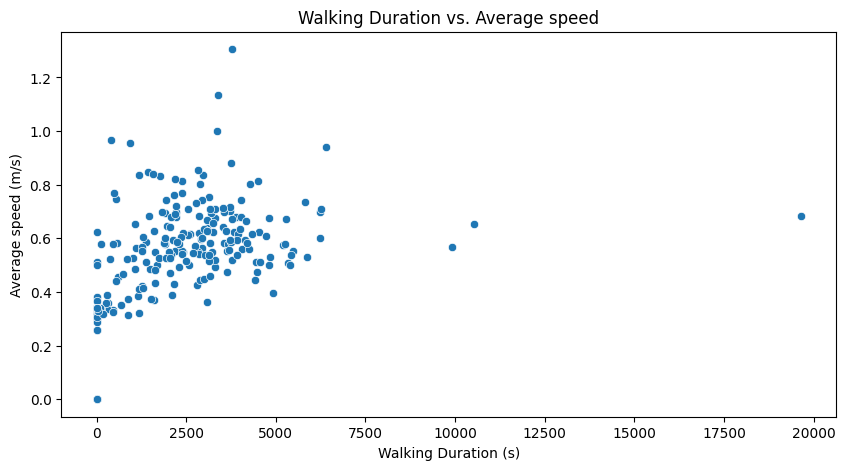

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Walking duration (s)', y='Average speed (m/s)')
plt.title('Walking Duration vs. Average speed')
plt.xlabel('Walking Duration (s)')
plt.ylabel('Average speed (m/s)')
plt.show()

### Line Plot of Step Count and Distance Over Time

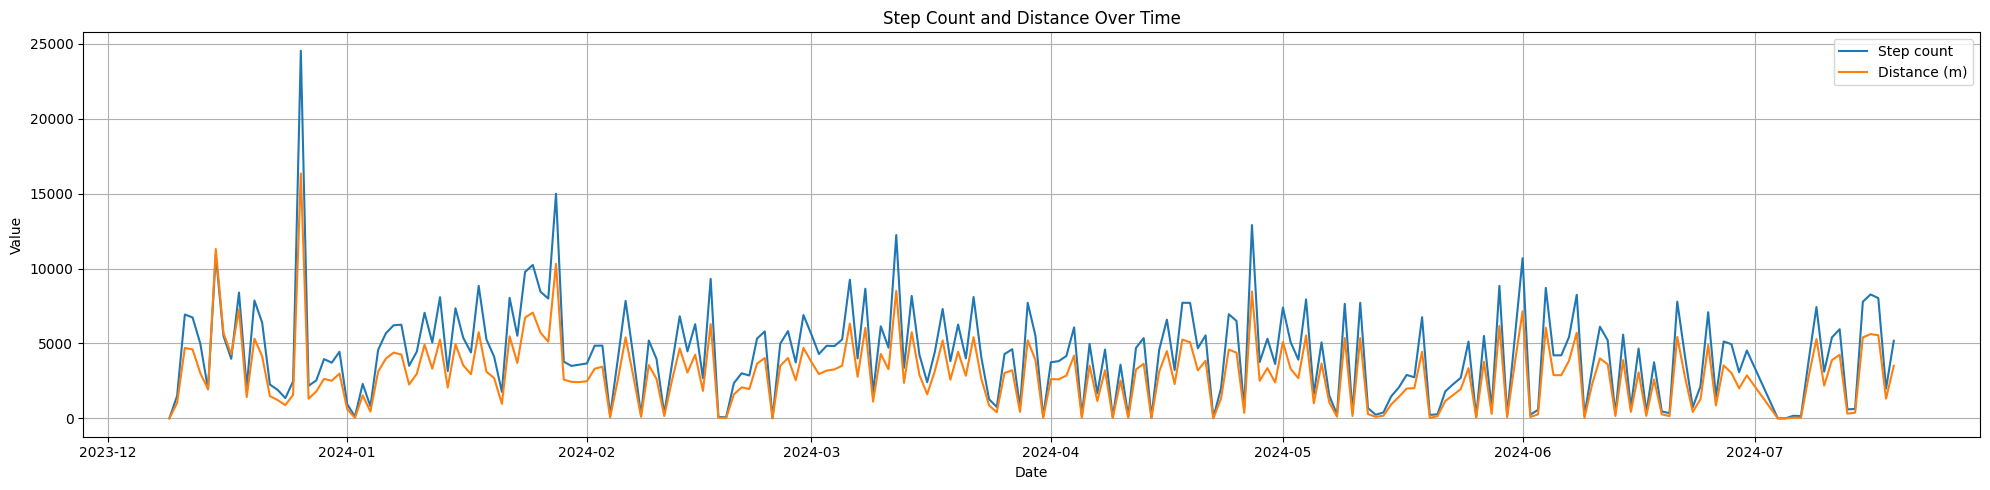

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['Step count'], label='Step count')
plt.plot(df.index, df['Distance (m)'], label='Distance (m)')

plt.title('Step Count and Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Pair Plot

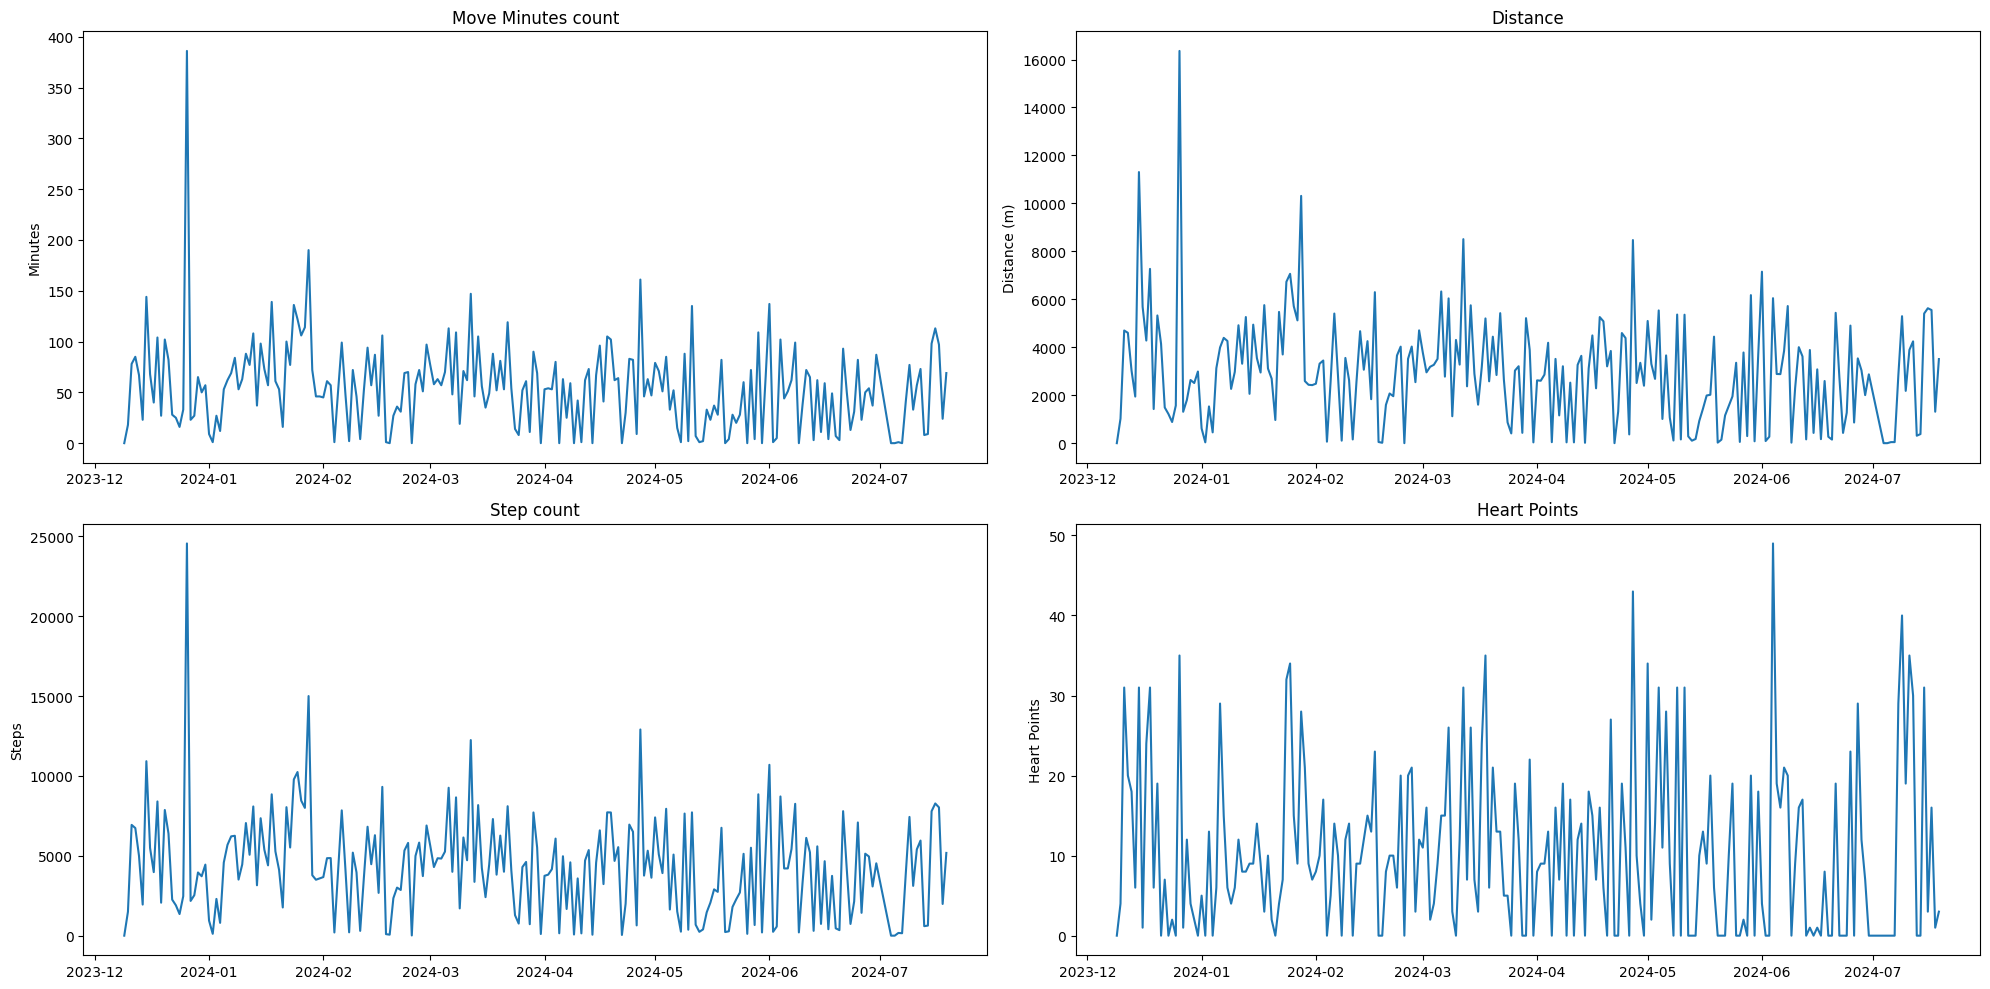

In [15]:
_, axes = plt.subplots(2, 2, figsize=(20, 10))

# Move Minutes count
axes[0, 0].plot(df.index, df['Move Minutes count'])
axes[0, 0].set_title('Move Minutes count')
axes[0, 0].set_ylabel('Minutes')

# Distance
axes[0, 1].plot(df.index, df['Distance (m)'])
axes[0, 1].set_title('Distance')
axes[0, 1].set_ylabel('Distance (m)')

# Step count
axes[1, 0].plot(df.index, df['Step count'])
axes[1, 0].set_title('Step count')
axes[1, 0].set_ylabel('Steps')

# Heart points
axes[1, 1].plot(df.index, df['Heart Points'])
axes[1, 1].set_title('Heart Points')
axes[1, 1].set_ylabel('Heart Points')

plt.tight_layout()
plt.show()